
Machine Learning Class Project

Images Data Source: https://www.kaggle.com/c/state-farm-distracted-driver-detection

State Farm Distracted Driver Images

10 different labels/categories, taken from 26 different drivers 

Each color image is 640*480 pixels, and there are 22,424 images in training dataset


In [1]:
import pandas as pd
import numpy as np
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from PIL import Image
import cv2
import os
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
def readcsvfile(filename):
    file_open=open(filename,'r')
    lines_data=[]
    for line in iter(file_open):
        if 'subject' in line:
            continue
        line=line.rstrip()
        lines_data.append(line.split(','))
    return lines_data

In [3]:
dtsinfo=readcsvfile('../dataSetImage/stateFarm_distractedDriver_all/driver_imgs_list.csv')

In [4]:
train1, train2 = train_test_split(dtsinfo, test_size=0.3)

In [5]:
driverids=['p002', 'p012', 'p014', 'p015', 'p016', 'p021', 'p022', 'p024', 'p026', 'p035', 'p039', 'p041', 'p042', 'p045', 'p047', 'p049', 'p050', 'p051', 'p052', 'p056', 'p061', 'p064', 'p066', 'p072', 'p075', 'p081']
labels=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [1]:
# Get Distribution info (driver id, behavior label)
def getDataDriverLabelDisMat(dsipt):
    tpz0=[]
    for i in range(10):
        tpz0.append(0)
    numimgs=[]    
    for i in range(26):
        numimgs.append(tpz0.copy())
    pp={}
    lbllst={}
    for x in dsipt:
        i=int(x[0][1:])
        lb0=int(x[1][1:])
        if i in pp:
            pp[i]+=1
        else:
            pp[i]=1
        if lb0 in lbllst:
            lbllst[lb0]+=1
        else:
            lbllst[lb0]=1    
        idxi=driverids.index(x[0])
        idxj=labels.index(x[1])                     
        numimgs[idxi][idxj]+=1 
    return [numimgs,lbllst,pp]

In [7]:
orgdsinfo=getDataDriverLabelDisMat(dtsinfo)
numimgsorg=orgdsinfo[0]
train1dsinfo=getDataDriverLabelDisMat(train1)
numimgs=train1dsinfo[0]

Text(0.5,135.829,'Behavior labels')

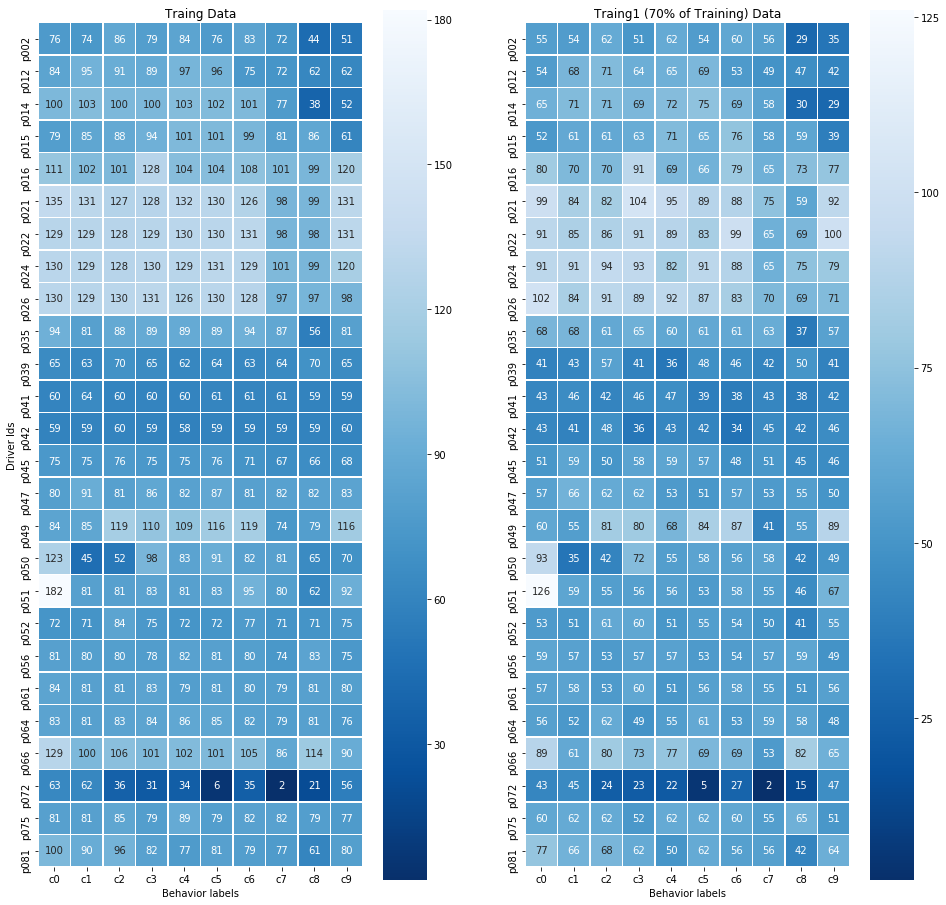

In [8]:
plt.figure(figsize=(16,16))
plt.subplot(121)
ax=sns.heatmap(numimgsorg, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r',xticklabels=labels, yticklabels=driverids);
plt.title('Traing Data')
plt.ylabel('Driver Ids');
plt.xlabel('Behavior labels')
plt.subplot(122)
plt.title('Traing1 (70% of Training) Data')
ax=sns.heatmap(numimgs, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r',xticklabels=labels, yticklabels=driverids);
plt.xlabel('Behavior labels')


In [9]:
#print(len(pp.keys()))
#print(pp.keys())
#print(pp.values())
#print(len(lbllst.keys()))
#print(lbllst.keys())
#print(lbllst.values())

In [10]:
trainImgFileDir='../dataSetImage/stateFarm_distractedDriver_all/imgs/train/'

In [11]:
imgsz2=240*320
imgsz4=120*160
imgsz8=60*80
def cv2GetImgFileDataG2(filename):
    img=cv2.imread(filename, cv2.IMREAD_REDUCED_GRAYSCALE_2)
    img2=np.reshape(img,(1,imgsz2))
    lst=img2.tolist()
    return lst[0]
def cv2GetImgFileDataG4(filename):
    img=cv2.imread(filename, cv2.IMREAD_REDUCED_GRAYSCALE_4)
    img2=np.reshape(img,(1,imgsz4))
    lst=img2.tolist()
    return lst[0]
def cv2GetImgFileDataG8(filename):
    img=cv2.imread(filename, cv2.IMREAD_REDUCED_GRAYSCALE_8)
    img2=np.reshape(img,(1,imgsz8))
    lst=img2.tolist()
    return lst[0]
def cv2GetImgFileDataC2(filename):
    img=cv2.imread(filename, cv2.IMREAD_REDUCED_COLOR_2)
    img2=np.reshape(img,(1,imgsz2))
    lst=img2.tolist()
    return lst[0]
def cv2GetImgFileDataC4(filename):
    img=cv2.imread(filename, cv2.IMREAD_REDUCED_COLOR_4)
    img2=np.reshape(img,(1,imgsz4))
    lst=img2.tolist()
    return lst[0]
def cv2GetImgFileDataC8(filename):
    img=cv2.imread(filename, cv2.IMREAD_REDUCED_COLOR_8)
    img2=np.reshape(img,(1,imgsz8))
    lst=img2.tolist()
    return lst[0]

In [12]:
XTrain1G4=[]
XTrain1G8=[]

In [13]:
for itm in train1:  
    XTrain1G4.append(cv2GetImgFileDataG4(trainImgFileDir+itm[1]+'/'+itm[2]))

In [14]:
print(len(XTrain1G4))
print(len(XTrain1G4[0]))

15696
19200


In [15]:
from sklearn.decomposition import PCA

In [16]:
#testpcsz=12*12 

In [27]:
XTrain1G4NP=np.array(XTrain1G4)

In [18]:
#pcaG4 = PCA(n_components=testpcsz)
#pcaG4Mdl = pcaG4.fit(XTrain1G4NP)
#pcpntsG4 = pcaG4.fit_transform(XTrain1G4NP)

In [19]:
#pcpntsG4 = pcaG4Mdl.transform(XTrain1G4NP)

In [20]:
#cumvarG4=0.0
#for x in pcaG4.explained_variance_ratio_:
#    cumvarG4+=x
#print(cumvarG4)

In [21]:
#pcaG4v2 = PCA(n_components=180)

In [22]:
#pcaG4Mdlv2 = pcaG4v2.fit(XTrain1G4NP)

In [23]:
#cumvarG4v2=0.0
#for x in pcaG4v2.explained_variance_ratio_:
#    cumvarG4v2+=x
#print(cumvarG4v2)

In [28]:
pcaG4v3 = PCA(n_components=324) #18*18=324

In [29]:
pcaG4Mdlv3 = pcaG4v3.fit(XTrain1G4NP)

In [30]:
cumvarG4v3=0.0
for x in pcaG4v3.explained_variance_ratio_:
    cumvarG4v3+=x
print(cumvarG4v3)

0.9309808161380317


In [31]:
pcpntsG4v3 = pcaG4Mdlv3.transform(XTrain1G4NP)

In [32]:
import pickle

In [33]:
filename = 'sfdd_g4_n324_pca_0115.pkl'
pickle.dump(pcaG4v3, open(filename, 'wb'))

In [34]:
Ytrain1=[]

In [35]:
for itm in train1:
    Ytrain1.append(int(itm[1][1]))

In [36]:
Ytrain1NP=np.array(Ytrain1)

In [37]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(pcpntsG4v3,Ytrain1NP)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
filename = 'sfdd_g4_n324_dt_0115.pkl'
pickle.dump(dtmodel, open(filename, 'wb'))

In [39]:
fif=open('sfdd_train2_0115.csv','w')
for x in train2:
    fif.write(','.join(x)+'\n')
fif.close() 

In [40]:
fif=open('sfdd_train1_0115.csv','w')
for x in train1:
    fif.write(','.join(x)+'\n')
fif.close() 

In [41]:
pcaG4v4 = PCA(n_components=400) 

In [42]:
pcaG4Mdlv4 = pcaG4v4.fit(XTrain1G4NP)

In [44]:
pcpntsG4v4 = pcaG4Mdlv4.transform(XTrain1G4NP)

In [43]:
filename = 'sfdd_g4_n400_pca_0115.pkl'
pickle.dump(pcaG4v4, open(filename, 'wb'))

In [45]:
dtmodel2 = DecisionTreeClassifier()
dtmodel2.fit(pcpntsG4v4,Ytrain1NP)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
filename = 'sfdd_g4_n400_dt_0115.pkl'
pickle.dump(dtmodel2, open(filename, 'wb'))

In [47]:
cumvarG4v4=0.0
for x in pcaG4v4.explained_variance_ratio_:
    cumvarG4v4+=x
print(cumvarG4v4)

0.939685604456838


In [48]:
pcaG4v5 = PCA(n_components=500) 

In [49]:
pcaG4Mdlv5 = pcaG4v5.fit(XTrain1G4NP)

In [50]:
pcpntsG4v5 = pcaG4Mdlv5.transform(XTrain1G4NP)

In [51]:
filename = 'sfdd_g4_n500_pca_0115.pkl'
pickle.dump(pcaG4v5, open(filename, 'wb'))

In [52]:
cumvarG4v5=0.0
for x in pcaG4v5.explained_variance_ratio_:
    cumvarG4v5+=x
print(cumvarG4v5)

0.9479139726975576


In [60]:
dtmodel3 = DecisionTreeClassifier()
dtmodel3.fit(pcpntsG4v5,Ytrain1NP)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
filename = 'sfdd_g4_n500_dt_0115.pkl'
pickle.dump(dtmodel3, open(filename, 'wb'))

In [54]:
print(24*24)
print(25*25)
print(26*26)

576
625
676


In [55]:
pcaG4v6 = PCA(n_components=676) 

In [56]:
pcaG4Mdlv6 = pcaG4v6.fit(XTrain1G4NP)

In [57]:
pcpntsG4v6 = pcaG4Mdlv6.transform(XTrain1G4NP)

In [58]:
filename = 'sfdd_g4_n676_pca_0115.pkl'
pickle.dump(pcaG4v6, open(filename, 'wb'))

In [59]:
cumvarG4v6=0.0
for x in pcaG4v6.explained_variance_ratio_:
    cumvarG4v6+=x
print(cumvarG4v6)

0.957787048259112


In [62]:
dtmodel4 = DecisionTreeClassifier()
dtmodel4.fit(pcpntsG4v6,Ytrain1NP)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
filename = 'sfdd_g4_n676_dt_0115.pkl'
pickle.dump(dtmodel4, open(filename, 'wb'))

In [64]:
pcaG4v7 = PCA(n_components=800)

In [65]:
pcaG4Mdlv7 = pcaG4v7.fit(XTrain1G4NP)

In [66]:
pcpntsG4v7 = pcaG4Mdlv7.transform(XTrain1G4NP)

In [67]:
filename = 'sfdd_g4_n800_pca_0115.pkl'
pickle.dump(pcaG4v7, open(filename, 'wb'))

In [68]:
cumvarG4v7=0.0
for x in pcaG4v7.explained_variance_ratio_:
    cumvarG4v7+=x
print(cumvarG4v7)

0.96274160417002


In [69]:
dtmodel5 = DecisionTreeClassifier()
dtmodel5.fit(pcpntsG4v7,Ytrain1NP)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
filename = 'sfdd_g4_n800_dt_0115.pkl'
pickle.dump(dtmodel5, open(filename, 'wb'))

In [71]:
dtmodel6 = DecisionTreeClassifier()
dtmodel6.fit(XTrain1G4NP,Ytrain1NP)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
filename = 'sfdd_g4_org_dt_0115.pkl'
pickle.dump(dtmodel6, open(filename, 'wb'))

In [73]:
from sklearn.naive_bayes import GaussianNB
mdlnb = GaussianNB()
mdlnb.fit(XTrain1G4NP,Ytrain1NP)
pickle.dump(mdlnb, open('sfdd_g4_org_nb_0115.pkl', 'wb'))
mdlnb.fit(pcpntsG4v7,Ytrain1NP)
pickle.dump(mdlnb, open('sfdd_g4_n800_nb_0115.pkl', 'wb'))
mdlnb.fit(pcpntsG4v6,Ytrain1NP)
pickle.dump(mdlnb, open('sfdd_g4_n676_nb_0115.pkl', 'wb'))
mdlnb.fit(pcpntsG4v5,Ytrain1NP)
pickle.dump(mdlnb, open('sfdd_g4_n500_nb_0115.pkl', 'wb'))
mdlnb.fit(pcpntsG4v4,Ytrain1NP)
pickle.dump(mdlnb, open('sfdd_g4_n400_nb_0115.pkl', 'wb'))

In [74]:
# Knn- classification, k-Nearest Neighbor Classification
from sklearn.neighbors import KNeighborsClassifier
mdlknn = KNeighborsClassifier()
mdlknn.fit(XTrain1G4NP,Ytrain1NP)
pickle.dump(mdlknn, open('sfdd_g4_org_knn_0115.pkl', 'wb'))
mdlknn.fit(pcpntsG4v7,Ytrain1NP)
pickle.dump(mdlknn, open('sfdd_g4_n800_knn_0115.pkl', 'wb'))
mdlknn.fit(pcpntsG4v6,Ytrain1NP)
pickle.dump(mdlknn, open('sfdd_g4_n676_knn_0115.pkl', 'wb'))
mdlknn.fit(pcpntsG4v5,Ytrain1NP)
pickle.dump(mdlknn, open('sfdd_g4_n500_knn_0115.pkl', 'wb'))
mdlknn.fit(pcpntsG4v4,Ytrain1NP)
pickle.dump(mdlknn, open('sfdd_g4_n400_knn_0115.pkl', 'wb'))

In [75]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
mdllr = LogisticRegression(solver = 'lbfgs',random_state=10)
mdllr.fit(XTrain1G4NP,Ytrain1NP)
pickle.dump(mdllr, open('sfdd_g4_org_lr_0115.pkl', 'wb'))
mdllr.fit(pcpntsG4v7,Ytrain1NP)
pickle.dump(mdllr, open('sfdd_g4_n800_lr_0115.pkl', 'wb'))
mdllr.fit(pcpntsG4v6,Ytrain1NP)
pickle.dump(mdllr, open('sfdd_g4_n676_lr_0115.pkl', 'wb'))
mdllr.fit(pcpntsG4v5,Ytrain1NP)
pickle.dump(mdllr, open('sfdd_g4_n500_lr_0115.pkl', 'wb'))
mdllr.fit(pcpntsG4v4,Ytrain1NP)
pickle.dump(mdllr, open('sfdd_g4_n400_lr_0115.pkl', 'wb'))